__Importing The Dependencies__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

__load data__

In [2]:
data=pd.read_csv(r"D:\Machine Learning Projects\Credit Card Fraud Detection\notebook\card_transdata.csv")

__Data Preprocessing__

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data.shape

(1000000, 8)

In [5]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [9]:
data['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [10]:
data['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [13]:
numeric_cols=data.select_dtypes(exclude="object").columns

In [14]:
numeric_cols

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

<Axes: >

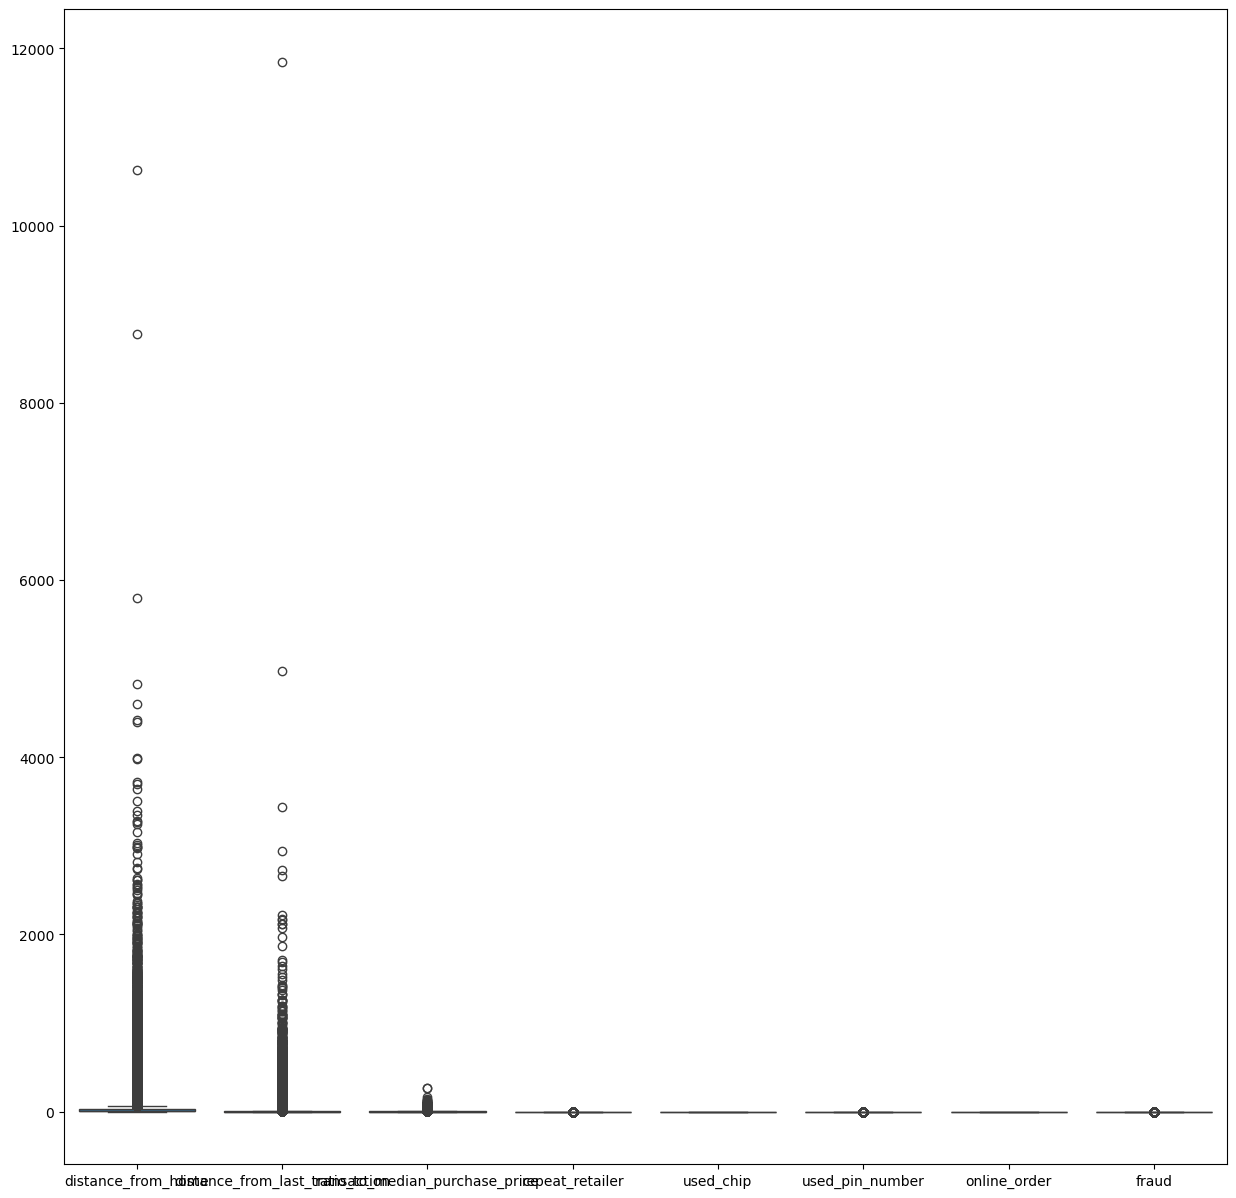

In [15]:
# check outliers
plt.figure(figsize=(15,15))
sns.boxplot(data)

In [16]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)


iqr=q3-q1
print(f"iqr value is {iqr}")

lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr

print(f"lower_fence fence value is {lower_fence}")
print(f"upper fence value is {upper_fence}")

# cleaned_data=data[~((data<lower_fence) | (data>upper_fence)).any(axis=1)]
# print(cleaned_data)

iqr value is distance_from_home                21.865977
distance_from_last_transaction     3.059077
ratio_to_median_purchase_price     1.620697
repeat_retailer                    0.000000
used_chip                          1.000000
used_pin_number                    0.000000
online_order                       1.000000
fraud                              0.000000
dtype: float64
lower_fence fence value is distance_from_home               -28.920958
distance_from_last_transaction    -4.291945
ratio_to_median_purchase_price    -1.955372
repeat_retailer                    1.000000
used_chip                         -1.500000
used_pin_number                    0.000000
online_order                      -1.500000
fraud                              0.000000
dtype: float64
upper fence value is distance_from_home                58.542951
distance_from_last_transaction     7.944363
ratio_to_median_purchase_price     4.527416
repeat_retailer                    1.000000
used_chip                    

__0->NOT FRAUD__

__1 -> FRAUD__

C:\Users\HP\AppData\Local\Temp\ipykernel_9752\3077209320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['distance_from_home'])


<Axes: xlabel='distance_from_home', ylabel='Density'>

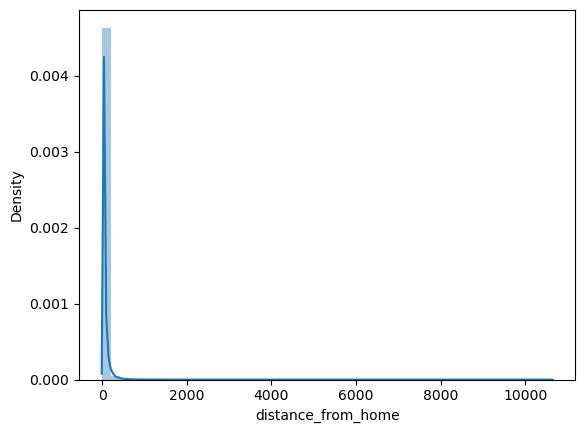

In [17]:
sns.distplot(data['distance_from_home'])

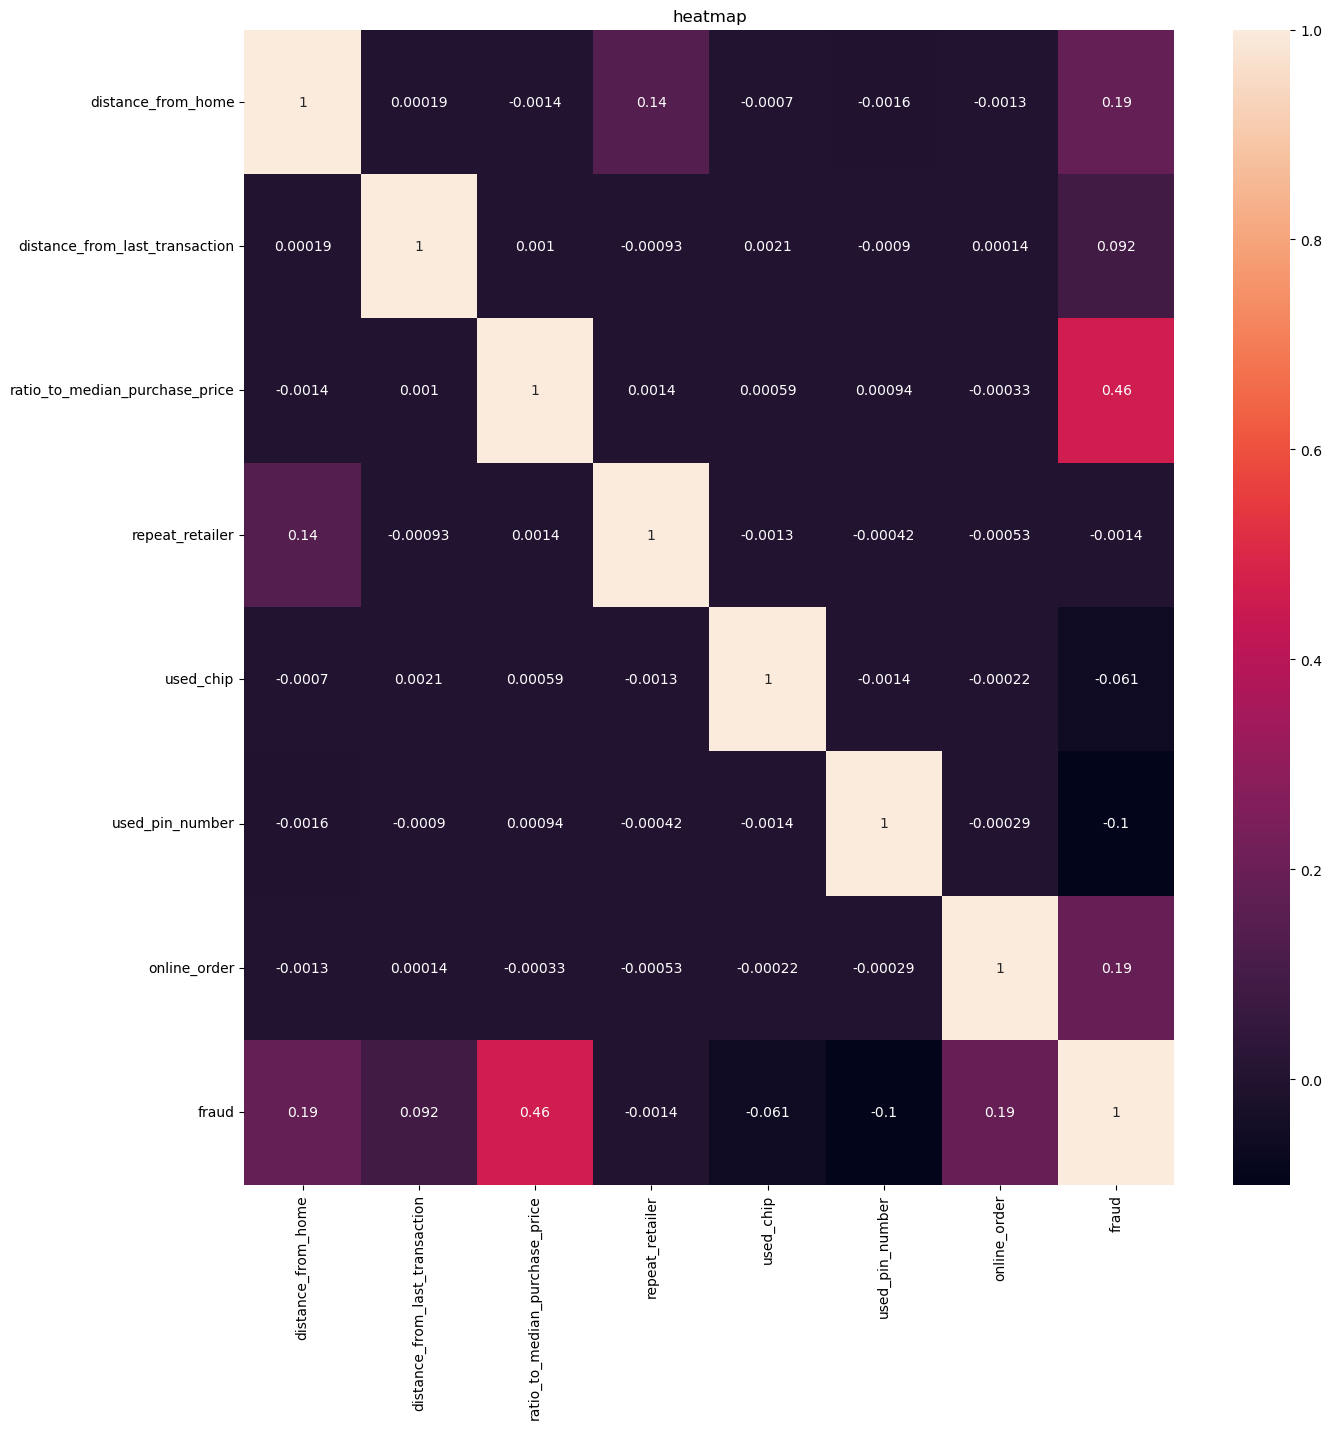

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.title("heatmap")
plt.show()

In [21]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [22]:
data['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [24]:
# split the data as x and y
x=data.drop(columns="fraud")
y=data["fraud"]

In [25]:
print(x)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [26]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
print(f"x_train shape is {x_train.shape}")
print(f"x_test shape is {x_test.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"y_test shape is {y_test.shape}")

x_train shape is (800000, 7)
x_test shape is (200000, 7)
y_train shape is (800000,)
y_test shape is (200000,)


In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [35]:
print(f"before smote the data shape  is:{x_train.shape}")
print(f"after smote the data shape is: {x_train_smote.shape} ")

before smote the data shape  is:(800000, 7)
after smote the data shape is: (1460080, 7) 


In [36]:
print(f"before smote the data shape  is:{y_train.shape}")
print(f"after smote the data shape is: {y_train_smote.shape} ")

before smote the data shape  is:(800000,)
after smote the data shape is: (1460080,) 


In [37]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_smote)
x_test_scaled=scaler.transform(x_test)

In [40]:
print(f"x_train scaled data shape is:{x_train_scaled.shape}")
print(f"x_test scaled data shape is:{x_test_scaled.shape}")

x_train scaled data shape is:(1460080, 7)
x_test scaled data shape is:(200000, 7)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [44]:
models={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),

}

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def evaluate_model(y_true,y_pred):
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    cm=confusion_matrix(y_true,y_pred)
    return accuracy,precision,recall,cm

In [48]:
print(f"x_test shape is {x_test_scaled.shape}")
print(f"y_test shape is {y_test.shape}")

x_test shape is (200000, 7)
y_test shape is (200000,)


In [52]:
for model_name,model in models.items():
    # print(f"model is {model}")

    model.fit(x_train_scaled,y_train_smote)

    y_train_pred=model.predict(x_train_scaled)
    y_test_pred=model.predict(x_test_scaled)

    accu_train,preci_train,reca_train,cm_train=evaluate_model(y_train_smote,y_train_pred)
    accu_test,preci_test,reca_test,cm_test=evaluate_model(y_test,y_test_pred)

    print("==============================================")
    print(f"model for train data is {model_name}")
    print(f"accuracy for train data is {accu_train}")
    print(f"precision for train data is {preci_train}")
    print(f"recall for train data is {reca_train}")
    print(f"cm for train data is {cm_train}")
    

    print(f"test data {model_name}")
    print(f"accuracy for test data is {accu_test}")
    print(f"precision for tets data is {preci_test}")
    print(f"recall for test data is {reca_test}")
    print(f"cm for test data is {cm_test}")


model for train data is LogisticRegression
accuracy for train data is 0.9419744123609666
precision for train data is 0.9346044018210716
recall for train data is 0.9504533998137088
cm for train data is [[681489  48551]
 [ 36171 693869]]
test data LogisticRegression
accuracy for test data is 0.935375
precision for tets data is 0.5789915378697811
recall for test data is 0.9492633147967666
cm for test data is [[170517  12040]
 [   885  16558]]
model for train data is KNeighborsClassifier
accuracy for train data is 0.9995294778368309
precision for train data is 0.9991377103883998
recall for train data is 0.999921922086461
cm for train data is [[729410    630]
 [    57 729983]]
test data KNeighborsClassifier
accuracy for test data is 0.998465
precision for tets data is 0.9857142857142858
recall for test data is 0.9968468726709855
cm for test data is [[182305    252]
 [    55  17388]]
model for train data is DecisionTreeClassifier
accuracy for train data is 1.0
precision for train data is 1.0

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


model for train data is AdaBoostClassifier
accuracy for train data is 0.9998390499150731
precision for train data is 0.999884927250734
recall for train data is 0.9997931620185195
cm for train data is [[729956     84]
 [   151 729889]]
test data AdaBoostClassifier
accuracy for test data is 0.999785
precision for tets data is 0.9982817869415808
recall for test data is 0.9992547153585966
cm for test data is [[182527     30]
 [    13  17430]]


In [53]:
pip install mlflow

  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached graphql_core-3.2.6-py3-none-any.whl.metadata (11 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached google_auth-2.40.1-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2

In [55]:
import mlflow

with mlflow.start_run():
    mlflow.log_metric("accuracy",accu_train)
    mlflow.log_metric("precision",preci_train)
    mlflow.log_metric("recall",reca_train)
    # mlflow.log_metric("precision",preci_train)


    mlflow.log_metric("accuracy",accu_test)
    mlflow.log_metric("precision",preci_test)
    mlflow.log_metric("recall",reca_test)
    # mlflow.log_metric("precision",preci_train)
   # save sklearn model
    mlflow.sklearn.log_model(model, "model")

2025/05/17 10:42:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
